In [2]:
from ae import CAE
 
import tensorflow as tf
# Module reload
from importlib import reload

import matplotlib.pyplot as plt

2023-03-11 14:33:58.945258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 14:33:59.648381: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib:/home/henri/ros2_humble/install/rosbag2_storage_mcap/lib:/home/henri/ros2_humble/install/rosbag2_compression_zstd/lib:/home/henri/ros2_humble/install/mcap_vendor/lib:/home/henri/ros2_humble/install/zstd_vendor/lib:/ho

In [32]:

model = CAE(latent_dim=32)
model.load_weights('checkpoints/ae')


In [13]:
import numpy as np

test = np.zeros((3,32,2))
test[1][0] = np.ones(2)

# get 0 idx of the first batch
print(np.array([test[0][0],test[1][0],test[2][0]]))

# simpler
print(test[:,0])

[[0. 0.]
 [1. 1.]
 [0. 0.]]
[[0. 0.]
 [1. 1.]
 [0. 0.]]


In [4]:
import model_utils
reload(model_utils)

data = model_utils.load_data('dataset0')

In [2]:
import numpy as np

np.mean([[1,0],[2,0]],axis=1)

array([0.5, 1. ])

In [10]:
import numpy as np

arr = np.zeros((3,10,2))

arr[0][0] = np.ones(2)

arr1 = np.roll(arr,-1,axis=1)
arr1[0][-1] = np.ones(2) * 0.5
arr1

array([[[0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0.5, 0.5]],

       [[0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ]],

       [[0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ]]])

In [20]:
import numpy as np

arr = np.zeros((3,2,2))
arr[0][0] = np.ones(2)
#(arr - np.mean(arr,axis=1)) / (np.std(arr,axis=1) + 1e-8)
np.std(arr,axis=1).shape

for i in range(3):
    arr[i] = (arr[i] - np.mean(arr[i])) / (np.std(arr[i]) + 1e-8)

arr 

array([[[ 0.99999998,  0.99999998],
        [-0.99999998, -0.99999998]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ]]])

In [6]:

reload(model_utils)
data = model_utils.normalize(data)
data = model_utils.grey_scale(data,[1, -0.5, 0])

In [29]:
imgs = data[10:20]
imgs.shape

(10, 64, 64, 1)

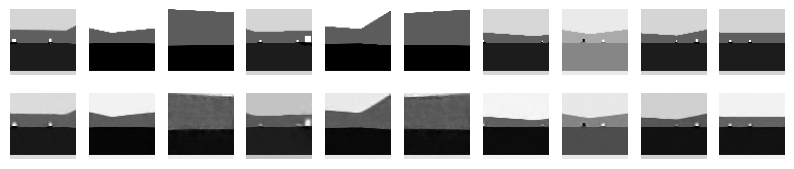

In [30]:
predicted = model(imgs)

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(2,10, i + 1)
    plt.imshow(imgs[i, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(predicted[i, :, :, 0], cmap='gray')
    plt.axis('off')
  

In [40]:
# Test for State Rolling Window

import tensorflow as tf
#tf.config.set_visible_devices([], 'GPU')
import numpy as np

#lstm = tf.keras.layers.LSTM(1,activation='tanh')
#model = tf.keras.Sequential([lstm])

context = 3
exp_size = 5
rob_size = 2

x = np.zeros((rob_size,exp_size,2))
y = np.zeros((rob_size,exp_size,1))


for j in range(rob_size):
    for i in range(5):
        x[j,i] = np.ones((2,))*i
        y[j,i] = np.ones((1,))*i
    x[j,0] = np.ones((2,))*5
# [[0,0],[1,1],[2,2],[3,3],[4,4]] => [[0,0],[0,0],[1,1],[2,2],[3,3],[4,4]]

#appendent = np.repeat(np.full_like(x[0],x[0]),context-1,axis=0).reshape((context-1,2))
#x = np.concatenate((appendent,x),axis=0)


# [[0,0],[1,1],[2,2],[3,3],[4,4]] => [[[0,0],[1,1]], [[1,1],[2,2]], [[2,2],[3,3]], [[3,3],[4,4]]]

# (3,episode_l,32) => (3,B,10,32)
new_x = np.zeros((rob_size,exp_size-context+1,context,2))
for j in range(rob_size):
    l = np.array([x[j,i-context:i] for i in range(context,exp_size+1)])
    #print(l)
    #print(l.shape)
    #print(new_x[j].shape)
    new_x[j] = l

y = y[:,context-1:]

#model.compile(optimizer='adam', loss='mse')
#model.fit(x, y, epochs=1)
new_x.shape,y
#appendent

((2, 3, 3, 2),
 array([[[2.],
         [3.],
         [4.]],
 
        [[2.],
         [3.],
         [4.]]]))

In [42]:
import numpy as np

x = np.zeros((3,5,1))
x[1] = np.ones((5,1))
x[2] = np.ones((5,1))*2

s = 0


for i in range(2):
    r_c = 2 if i == 0 else 1
    x_n = x[s:s+r_c].reshape(-1)

    print(x_n)
    s = s+r_c

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]


In [47]:
import numpy as np

arr = np.zeros((3,1))
arr[2] = True
arr,np.sum(arr)


(array([[0.],
        [0.],
        [1.]]),
 1.0)

In [12]:
import numpy as np

exps = np.array([[1,2,3,4,5,6,7,8]])

np.append(exps[:,-3:],[[4]],axis=1)

array([[6, 7, 8, 4]])

In [13]:
import numpy as np

a = np.array([[1,1],[-1,1],[1,-1],[-1,-1]])

b = np.array([[0.],[0.]]).astype(np.int32)

a,b,a[b]

(array([[ 1,  1],
        [-1,  1],
        [ 1, -1],
        [-1, -1]]),
 array([[0],
        [0]], dtype=int32),
 array([[[1, 1]],
 
        [[1, 1]]]))

In [5]:
import tensorflow as tf
import numpy as np
model_layers = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(64,activation='tanh'),
            #tf.keras.layers.Dense(64,activation='tanh',kernel_initializer=std_kernel_initilizer,bias_initializer=bias_initilizer),
            tf.keras.layers.LayerNormalization(),
            tf.keras.layers.LSTM(64,activation='tanh'),
            tf.keras.layers.LayerNormalization(),
            tf.keras.layers.Dense(2),
        ]
    )
model_layers.build(input_shape=(None, None,32))

model_layers(np.zeros((1,10,32)))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0., 0.]], dtype=float32)>

In [8]:
np.roll(np.array([0.2,0.1]),shift=1,axis=0)

array([0.1, 0.2])

In [ ]:
import tensorflow_probability as tfp

tfd = tfp.distributions.Categorical(probs=[0.2,0.1,0.3,0.4])

tfd.sample()

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.2007564],
       [-0.0850025]], dtype=float32)>

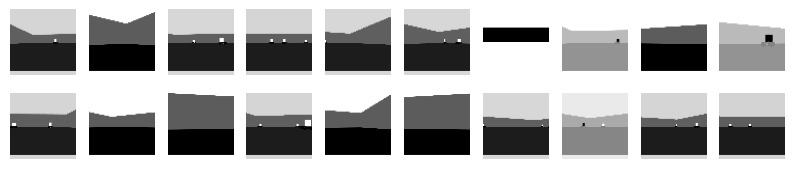

In [35]:
plt.figure(figsize=(10,2))
for i in range(20):
    plt.subplot(2,10, i + 1)
    plt.imshow(data[i, :, :, 0], cmap='gray')
    plt.axis('off')